## **PRACTICAL SESSION 1** — Deep Learning for predictive maintenance

The dataset used is the **AI4I 2020** Predictive Maintenance Dataset, which contains 10,000 instances of industrial sensor data. Each instance represents the operating condition of a machine and is associated with a label indicating whether a failure has occurred and, if so, what type of failure it is.

The 5 possible labels are:



*   **TWF**: Tool Wear Failure
*   **HDF**: Heat Dissipation Failure
*   **PWF**: Power Failure
*   **OSF**: Overstrain Failure
*   **RNF**: Random Failure


The data is available on eCAMPUS as CSV file called: "ai4i2020.csv"



## **PRACTICAL SESSION Goal** — Ceate a deep leanring model allowing to realize a predictive maintenance mission

## **1 - Analysis of the dataset**



All libraries used ***SHOULD BE PLACED*** in the code cell below

In [7]:
import pandas as pd

**QUESTION:** Load dataset and display some lines of the csv file.

In [8]:
df = pd.read_csv('../data/ai4i2020.csv')
print(df.head(10))

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   
5    6     M14865    M                298.1                    308.6   
6    7     L47186    L                298.1                    308.6   
7    8     L47187    L                298.1                    308.6   
8    9     M14868    M                298.3                    308.7   
9   10     M14869    M                298.5                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3       

**QUESTION:** Display the distribution of machine failures and non-failures with a bar graph.

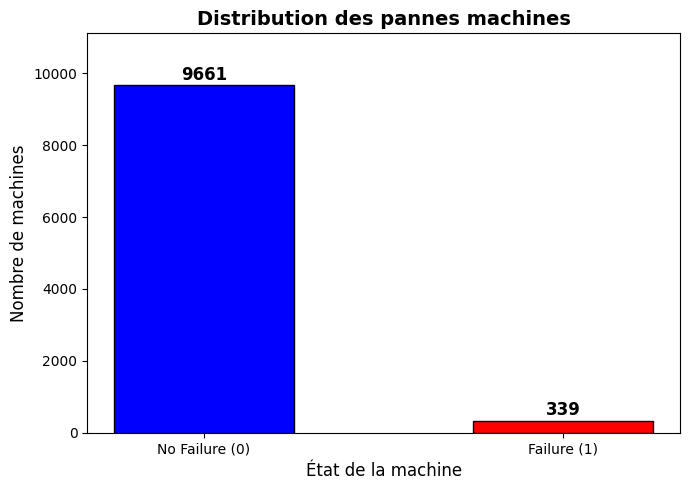

No Failure (0) : 9661 (96.6%)
Failure (1) : 339 (3.4%)


In [9]:
# comptage du nombre de machines en panne (1) et sans panne (0)
counts = df['Machine failure'].value_counts().sort_index()
labels = ['No Failure (0)', 'Failure (1)']

fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(labels, counts.values, color=['blue', 'red'], edgecolor='black', width=0.5)

# affichage de la valeur exacte au-dessus de chaque barre
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 50,
        str(int(bar.get_height())),
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )

ax.set_title('Distribution des pannes machines', fontsize=14, fontweight='bold')
ax.set_xlabel('État de la machine', fontsize=12)
ax.set_ylabel('Nombre de machines', fontsize=12)
ax.set_ylim(0, counts.max() * 1.15)

plt.tight_layout()
plt.savefig('../images/distribution_pannes.png', dpi=150)
plt.show()

# affichage du pourcentage pour chaque classe
total = counts.sum()
for i, (label, count) in enumerate(zip(labels, counts.values)):
    print(f"{label} : {count} ({count / total * 100:.1f}%)")

**ANALYSIS QUESTION:** What do you observe?

On observe un fort déséquilibre entre les deux classes puisque environ 9 661 machines n'ont pas subi de panne (≈ 96,6%) contre seulement 339 machines en panne (≈ 3,4%). Ce déséquilibre n'est pas très surprenant car on espère en effet qu'il y a moins de machines défectueuses qu'en bon état, mais ça pourrait poser des problèmes pour notre modèle.

**ANALYSIS QUESTION:** What will be the consequence of this phenomenon on the model's learning?

Le problème est que, pour la loss function, la stratégie la plus simple pour un modèle est de prédire systématiquement "No Failure" quelle que soit l'entrée. Ce faisant, il atteint mécaniquement une accuracy de 96,6 % sans avoir rien appris d'utile: c'est ce qu'on appelle le biais de classe majoritaire. Ce serait évdiemment trompeur car cela donne l'illustion qu'on a un bon modèle alors qu'il raterait 100 % des pannes réelles.

Dans un contexte industriel pour la maintenance prédictive, c'est l'inverse de ce qu'on cherche. Manquer une panne (faux négatif) peut entraîner des arrêts de production non planifiés, voire des accidents, tandis qu'une fausse alarme (faux positif) a des conséquences bien plus limitées. La classe minoritaire est donc paradoxalement la plus importante, et les métriques classiques comme l'accuracy ne suffisent pas pour évaluer correctement les performances du modèle sur ce type de données.

**QUESTION:** Create a bar chart showing the distribution of different failure types (TWF, HDF, PWF, OSF, RNF). Display the exact values above each bar in the chart."

In [ ]:
# colonnes correspondant aux types de pannes du dataset
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# comptage du nombre d'occurrences de chaque type de panne (valeur 1 = panne présente)
failure_counts = df[failure_types].sum()

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(failure_types, failure_counts.values, color='red', edgecolor='black', width=0.5)

# affichage de la valeur exacte au-dessus de chaque barre
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        str(int(bar.get_height())),
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )

ax.set_title('Distribution des types de pannes (sur 10 000 machines)', fontsize=13, fontweight='bold')
ax.set_xlabel('Type de panne', fontsize=12)
ax.set_ylabel('Nombre d\'occurrences', fontsize=12)
ax.set_ylim(0, failure_counts.max() * 1.2)

plt.tight_layout()
plt.savefig('../images/distribution_types_pannes.png', dpi=150)
plt.show()

# affichage des valeurs brutes pour référence
for ftype, count in failure_counts.items():
    print(f"{ftype} : {count} occurrences")


**ANALYSIS QUESTION:** What do you observe?

"Write here your response"

**QUESTION:** Create a bar chart showing the distribution of failure types (TWF, HDF, PWF, OSF, RNF) among machines that experienced a failure (Machine failure == 1). Additionally, add a "No Specific Failure" category to count cases where a machine failed but no specific failure type was recorded. Display the exact values above each bar in the chart."

**ANALYSIS QUESTION:** What do you obsrve comapred to the previous question ? What can you conclude?

"Write your response here"

**QUESTION:** Display the names of the different columns in the dataset with their respective data types.

**ANALYSIS QUESTION:** To train the model, what will be the inputs and outputs (What are the names of the columns that you will use?)? Justify your response.
Remember, you want to predict if the machine will fail, and if so, what kind of failure. You need to yse previous results to jsurtify your response.

"Write your response here"

## **2- Train model Without balancing the dataset**

---



In this section, you must build and train a model without rebalancing the dataset.

**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

**QUESTION** Code below the model architecture

**QUESTION** Code below the algorithms allowing to train model

**WARNING!** You need to plot the training and test accuracy and loss to check if our model is overfitting

**QUESTION** Plot the confusion matrix and the classification report

**Tips:**

*   classification report link

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   Matrix confusion

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html





**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"

## **3- Train model With balancing the dataset**

---

 Methods for rebalancing a dataset:


*   Use oversampling techniques (e.g., SMOTE) to generate synthetic data for minority classes


> https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



*   Apply undersampling techniques (e.g., random undersampling, Tomek Links, Edited Nearest Neighbors) to reduce the majority class size



> https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html



*   Use class weighting during model training to penalize errors on minority classes



> https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=fr


**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

**ANALYSIS QUESTION:** Explain the choices you made to balance the dataset.

"Write your response here"

**QUESTION:** Code below the model architecture


**TIP:** It could be interesting to keep it the same as before

**QUESTION** Code below the algorithms allowing to train model


**QUESTION** Plot the confusion matrix and the classification report

**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"